In [1]:
import pandas as pd
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df =pd.read_csv('data/data.csv')
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Instructions,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [4]:
df["Items in order"].value_counts()

Items in order
1 x Bageecha Pizza                                                                                                                                  877
1 x Bone in Jamaican Grilled Chicken                                                                                                                594
1 x All About Chicken Pizza                                                                                                                         449
1 x Margherita Pizza                                                                                                                                408
1 x Makhani Paneer Pizza                                                                                                                            353
                                                                                                                                                   ... 
1 x Bone in Peri Peri Grilled Chicken, 2 x Bone in Jamaican Grilled Chick

In [5]:
import re

# Function to expand an order line into list of items
def expand_items(order_str):
    parts = re.findall(r"(\d+)\s*x\s*([^,]+)", order_str)
    items = []
    for qty, name in parts:
        item_name = name.strip()
        items.extend([item_name] * int(qty))
    return items

# Apply the expansion to each row
df["expanded_items"] = df["Items in order"].apply(expand_items)

# Create a global list (flattened)
all_items = [item for sublist in df["expanded_items"] for item in sublist]

# Create a unique global item map
unique_items = sorted(set(all_items))
item_map = {f"item_{i+1}": name for i, name in enumerate(unique_items)}

print(df[["Items in order", "expanded_items"]])
print("\nGlobal item map:")
print(item_map)

                                          Items in order  \
0      1 x Grilled Chicken Jamaican Tender, 1 x Grill...   
1      1 x Peri Peri Fries, 1 x Fried Chicken Angara ...   
2                  1 x Bone in Peri Peri Grilled Chicken   
3      1 x Fried Chicken Ghostbuster Tender, 1 x Anga...   
4      1 x Peri Peri Krispers, 1 x Fried Chicken Anga...   
...                                                  ...   
21316      1 x Fried Chicken Desi Peri Peri Bites (Bone)   
21317         1 x Fried Chicken 65 Masala Boneless Bites   
21318                    1 x Korean Fried Chicken Slider   
21319                                1 x Ooh Saucy Fries   
21320                1 x Grilled Chicken Jamaican Slider   

                                          expanded_items  
0      [Grilled Chicken Jamaican Tender, Grilled Chic...  
1      [Peri Peri Fries, Fried Chicken Angara Tender,...  
2                    [Bone in Peri Peri Grilled Chicken]  
3      [Fried Chicken Ghostbuster Tender, A

In [6]:
import matplotlib.pyplot as plt

# --- Step 3: Count frequencies ---
item_counts = pd.Series(all_items).value_counts().reset_index()
item_counts.columns = ["Item", "Order Frequency"]

# --- Step 4: Print the full list sorted by frequency ---
print("=== Full Item Order Frequency List ===\n")
print(item_counts.to_string(index=False))

=== Full Item Order Frequency List ===

                                                  Item  Order Frequency
                                        Bageecha Pizza             3334
                            Chilli Cheese Garlic Bread             1932
                      Bone in Jamaican Grilled Chicken             1770
                               All About Chicken Pizza             1728
                                  Makhani Paneer Pizza             1524
                                      Margherita Pizza             1477
                                   Cheesy Garlic Bread             1336
                                 Jamaican Chicken Melt             1223
                                         Herbed Potato              980
                                  Tripple Cheese Pizza              959
                           Murgh Amritsari Seekh Pizza              877
                     Bone in Smoky Bbq Grilled Chicken              804
                        

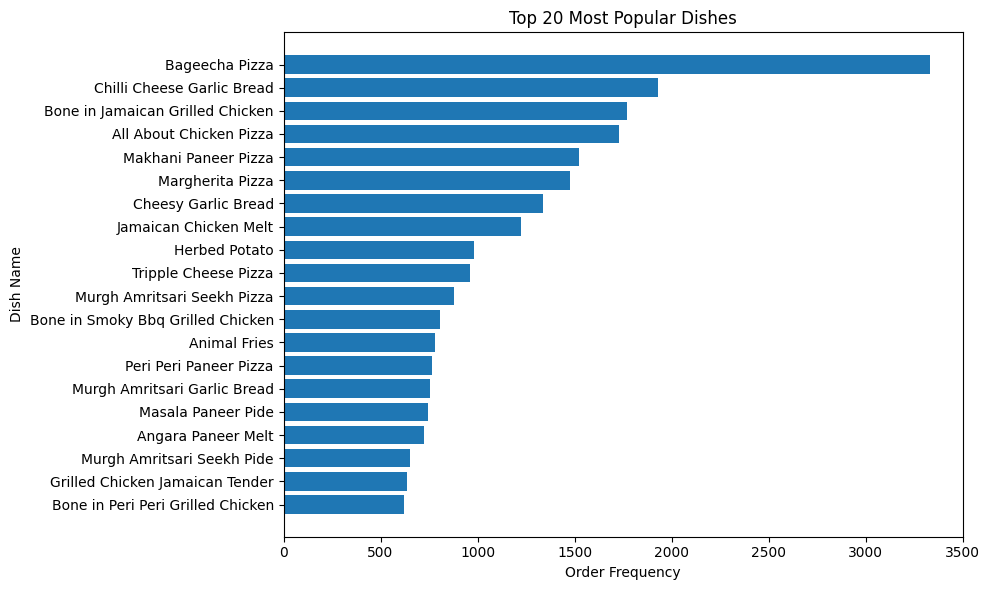

In [7]:
# --- Step 5: Plot top 20 items ---
plt.figure(figsize=(10,6))
plt.barh(item_counts["Item"].head(20)[::-1], item_counts["Order Frequency"].head(20)[::-1])
plt.title("Top 20 Most Popular Dishes")
plt.xlabel("Order Frequency")
plt.ylabel("Dish Name")
plt.tight_layout()
plt.show()

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID', 'expanded_items'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


In [10]:
df.shape

(21321, 30)

In [11]:
# List of post-order and leaking columns to drop
# Drop columns irrelevant for pre-order demand prediction
drop_cols = [
    #  post-order columns and unwanted columns to be dropped
    'Instructions', 'Rating', 'Review', 'Cancellation / Rejection reason',
    'Restaurant compensation (Cancellation)', 'Restaurant penalty (Rejection)',
    'Customer complaint tag', 'Order Ready Marked', 'Customer ID',
    'KPT duration (minutes)', 'Rider wait time (minutes)',
    'Bill subtotal',
    'Packaging charges',
    'Restaurant discount (Promo)',
    'Restaurant discount (Flat offs, Freebies & others)',
    'Gold discount',
    'Brand pack discount',
    'Total'
]

df = df.drop(columns=drop_cols, errors='ignore')
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Discount construct,expanded_items
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",40% off upto Rs.80,"[Grilled Chicken Jamaican Tender, Grilled Chic..."
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",Flat Rs.175 off,"[Peri Peri Fries, Fried Chicken Angara Tender,..."
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,40% off upto Rs.80,[Bone in Peri Peri Grilled Chicken]
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",40% off upto Rs.80,"[Fried Chicken Ghostbuster Tender, Angara Gril..."
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",40% off upto Rs.80,"[Peri Peri Krispers, Fried Chicken Angara Tender]"


In [12]:
df.shape

(21321, 12)

In [13]:
# get all unique day from order date
df["Order Placed At"].nunique()

19114

In [14]:
df["Subzone"].value_counts()

Subzone
Greater Kailash 2 (GK2)    7380
Sector 4                   6530
DLF Phase 1                3686
Sector 135                 2442
Vasant Kunj                 920
Shahdara                    360
Chittaranjan Park             2
Sikandarpur                   1
Name: count, dtype: int64

In [15]:
df["Restaurant name"].value_counts()

Restaurant name
Aura Pizzas             14548
Swaad                    6332
Dilli Burger Adda         227
Tandoori Junction         154
The Chicken Junction       32
Masala Junction            28
Name: count, dtype: int64

In [16]:
# Convert "Order Placed At" to datetime
df["Order_Datetime"] = pd.to_datetime(df["Order Placed At"], format="%I:%M %p, %B %d %Y")

In [17]:
# Get unique values in city and subzone
unique_cities = df["City"].unique()
unique_subzones = df["Subzone"].unique()
unique_cities, unique_subzones

(array(['Delhi NCR'], dtype=object),
 array(['Sector 4', 'Greater Kailash 2 (GK2)', 'DLF Phase 1', 'Sector 135',
        'Vasant Kunj', 'Shahdara', 'Sikandarpur', 'Chittaranjan Park'],
       dtype=object))

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/1226509848.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


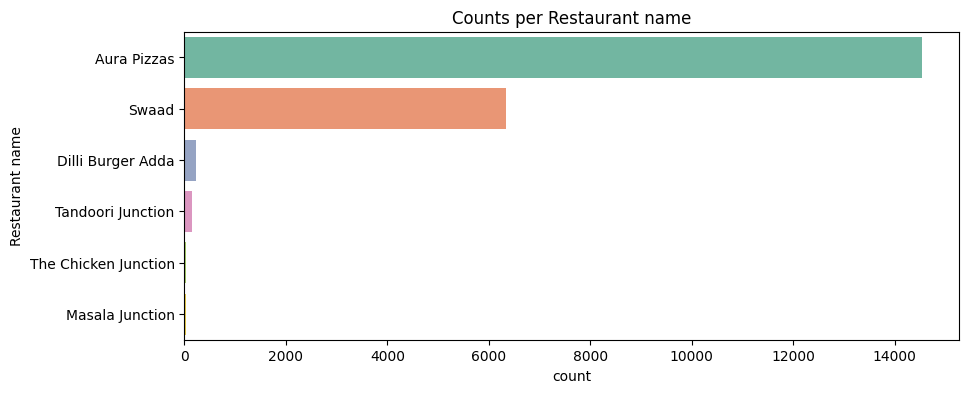

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/1226509848.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


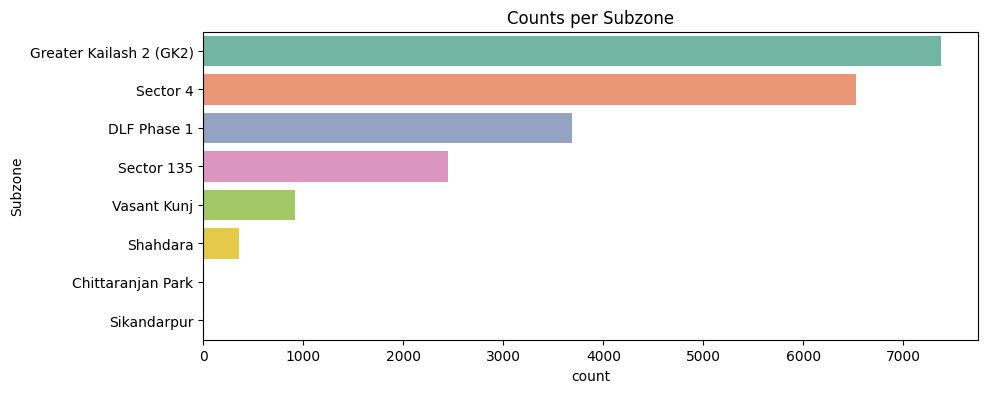

In [18]:
import seaborn as sns

cat_cols = ['Restaurant name','Subzone']
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")
    plt.title(f'Counts per {col}')
    plt.show()

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/1603766483.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette="viridis")


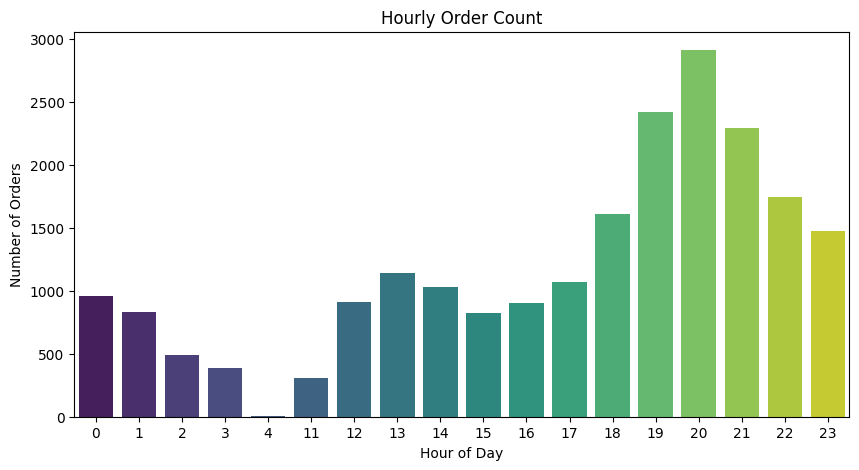

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df['hour'] = df['Order_Datetime'].dt.hour
orders_by_hour = df.groupby('hour')['Order ID'].count()

plt.figure(figsize=(10,5))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette="viridis")
plt.title("Hourly Order Count")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()


/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/918526561.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="coolwarm")


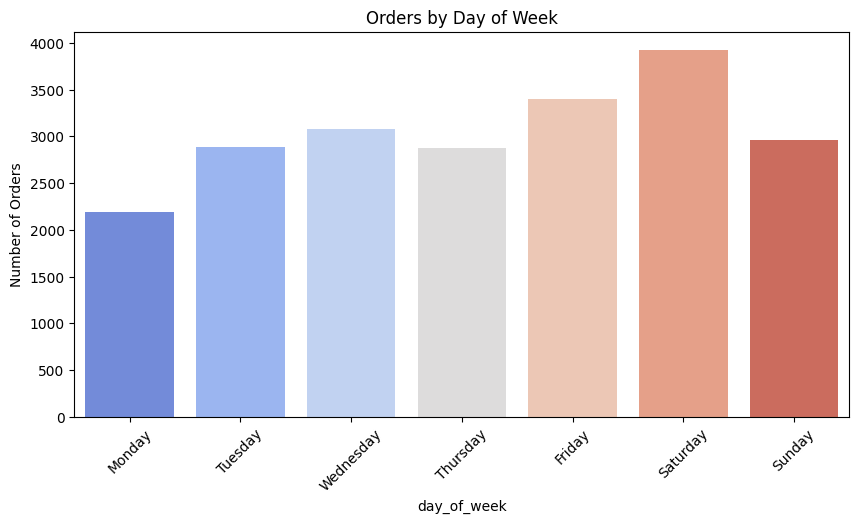

In [20]:
df['day_of_week'] = df['Order_Datetime'].dt.day_name()
orders_by_day = df.groupby('day_of_week')['Order ID'].count().reindex([
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
])

plt.figure(figsize=(10,5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="coolwarm")
plt.title("Orders by Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

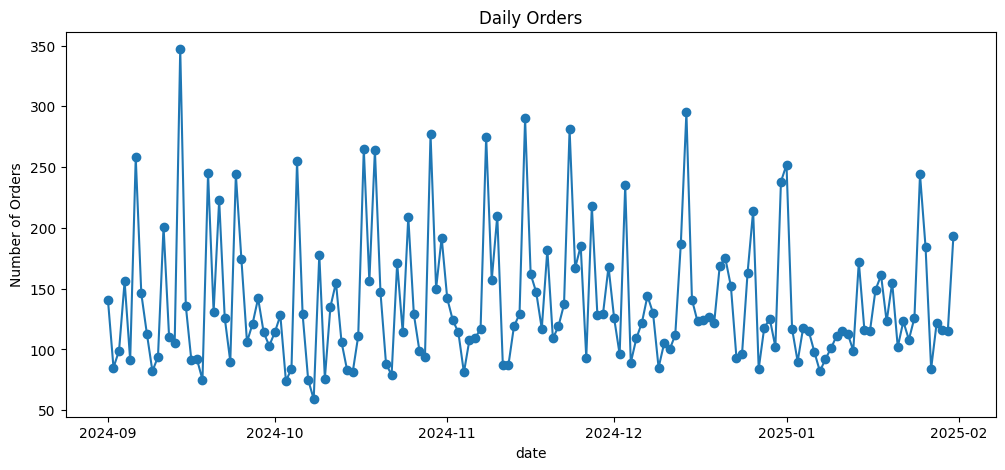

In [21]:
df['date'] = df['Order_Datetime'].dt.date
daily_orders = df.groupby('date')['Order ID'].count()
daily_orders.plot(figsize=(12,5), marker='o')
plt.title("Daily Orders")
plt.ylabel("Number of Orders")
plt.show()

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/2251142263.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="meal_slot", data=df, order=["Breakfast","Lunch","Dinner","After Hours"], palette="magma")


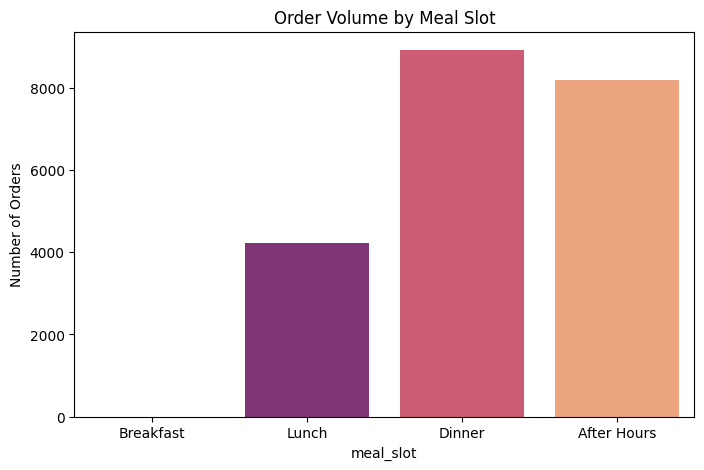

In [22]:
# Define meal slots
def meal_slot(hour):
    if 6 <= hour < 11:
        return "Breakfast"
    elif 11 <= hour < 16:
        return "Lunch"
    elif 16 <= hour < 21:
        return "Dinner"
    else:
        return "After Hours"

df["meal_slot"] = df["hour"].apply(meal_slot)

# Plot demand by meal slot
plt.figure(figsize=(8,5))
sns.countplot(x="meal_slot", data=df, order=["Breakfast","Lunch","Dinner","After Hours"], palette="magma")
plt.title("Order Volume by Meal Slot")
plt.ylabel("Number of Orders")
plt.show()

In [23]:
import holidays

# Weekend and month features
df['is_weekend'] = df['Order_Datetime'].dt.dayofweek >= 5
df['month'] = df['Order_Datetime'].dt.month
df['month_name'] = df['Order_Datetime'].dt.month_name()

# Holiday feature (using Indian public holidays)
years = df['Order_Datetime'].dt.year.unique()
indian_holidays = holidays.India(years=years)

df['is_holiday'] = df['Order_Datetime'].dt.date.isin(indian_holidays)

# Quick check
print(df[['Order_Datetime', 'is_weekend', 'month_name', 'is_holiday']].head())


       Order_Datetime  is_weekend month_name  is_holiday
0 2024-09-10 23:38:00       False  September       False
1 2024-09-10 23:34:00       False  September       False
2 2024-09-10 15:52:00       False  September       False
3 2024-09-10 15:45:00       False  September       False
4 2024-09-10 15:04:00       False  September       False


In [24]:
#checking to see the days where it was a weekday but also a holiday
weekday_holidays = df[(df['is_weekend'] == False) & (df['is_holiday'] == True)]
print(weekday_holidays[['Order_Datetime', 'month_name', 'is_weekend', 'is_holiday']])

           Order_Datetime month_name  is_weekend  is_holiday
1311  2024-09-16 20:42:00  September       False        True
1312  2024-09-16 18:10:00  September       False        True
1313  2024-09-16 14:55:00  September       False        True
1314  2024-09-16 13:26:00  September       False        True
1315  2024-09-16 12:24:00  September       False        True
...                   ...        ...         ...         ...
17218 2024-12-25 16:47:00   December       False        True
17219 2024-12-25 14:24:00   December       False        True
17220 2024-12-25 14:18:00   December       False        True
17289 2024-12-25 21:34:00   December       False        True
17290 2024-12-25 12:43:00   December       False        True

[864 rows x 4 columns]


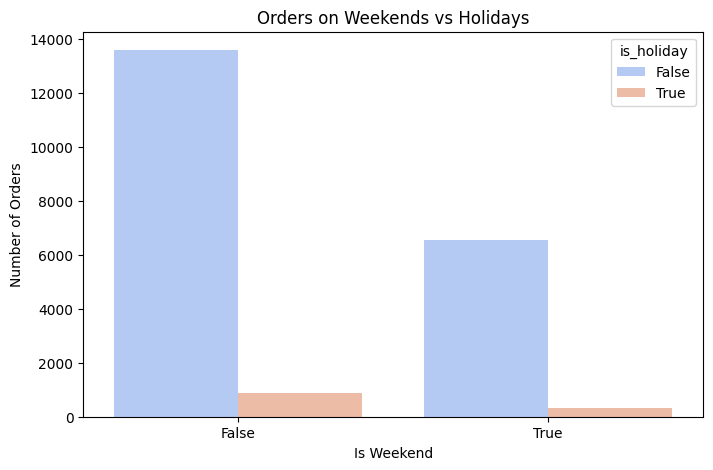

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='is_weekend', hue='is_holiday', palette='coolwarm')
plt.title('Orders on Weekends vs Holidays')
plt.xlabel('Is Weekend')
plt.ylabel('Number of Orders')
plt.show()


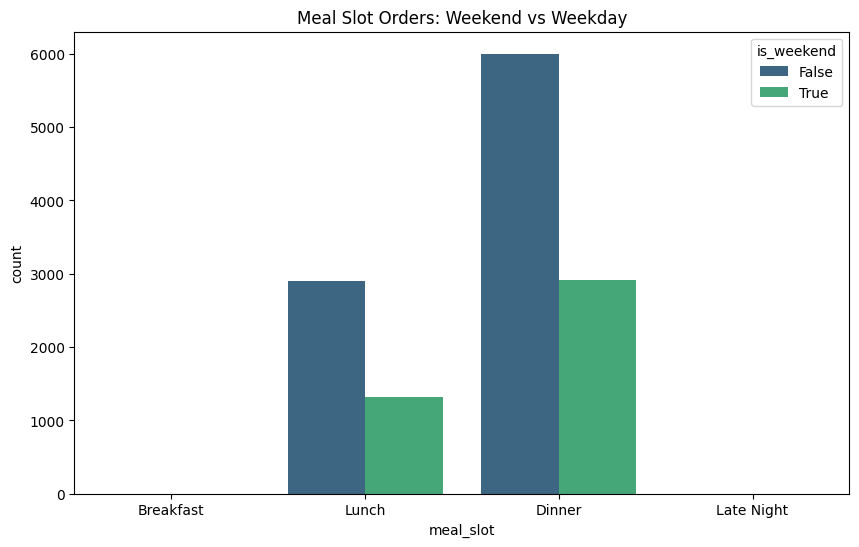

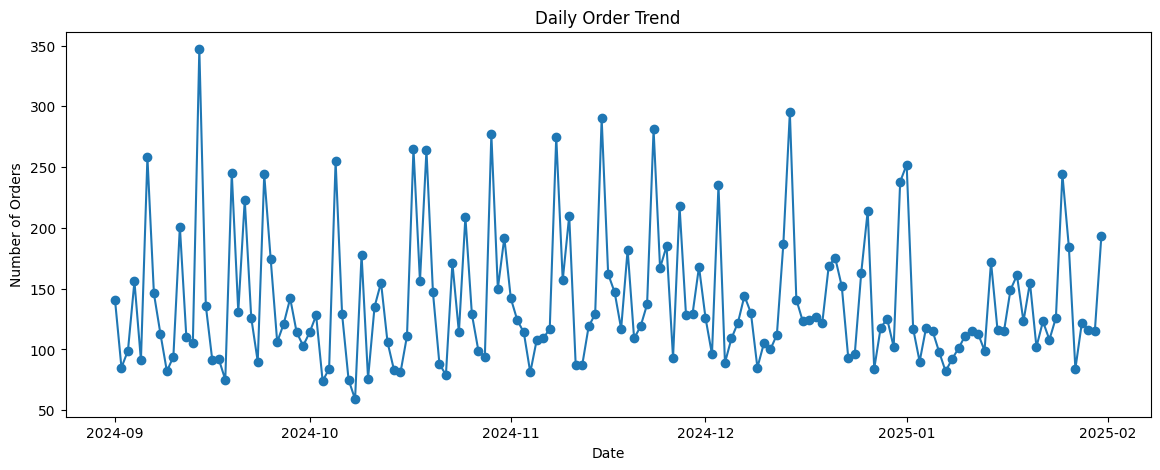

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/3249782062.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg_month.index, y=daily_avg_month.values, order=month_order, palette="magma")


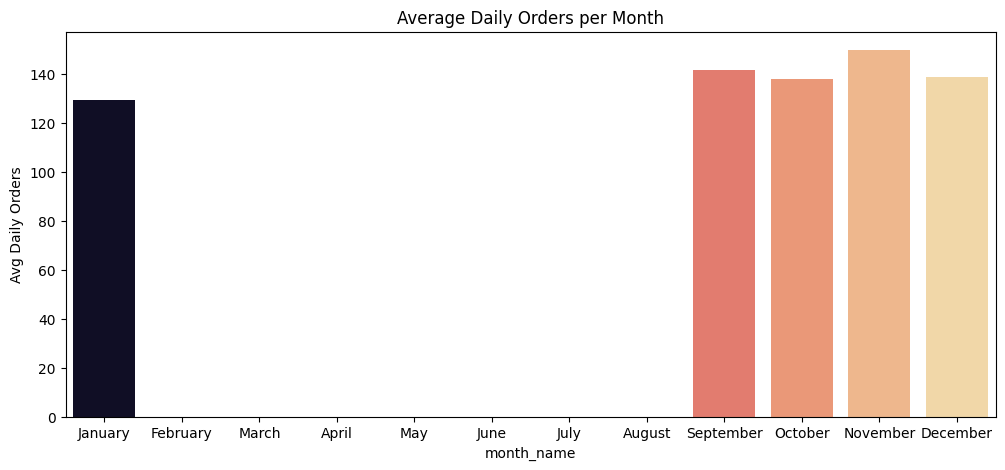

In [26]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# 1. Orders per meal slot by weekend/holiday
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='meal_slot', hue='is_weekend', palette='viridis', order=["Breakfast","Lunch","Dinner","Late Night"])
plt.title("Meal Slot Orders: Weekend vs Weekday")
plt.show()

# 2. Daily order trend to see seasonality
daily_orders = df.groupby('date')['Order ID'].count()
plt.figure(figsize=(14,5))
daily_orders.plot(marker='o')
plt.title("Daily Order Trend")
plt.ylabel("Number of Orders")
plt.xlabel("Date")
plt.show()

# 3. Monthly average daily orders (normalizes month length)
daily_avg_month = df.groupby(['month_name'])['Order ID'].count() / df.groupby(['month_name'])['date'].nunique()
plt.figure(figsize=(12,5))
sns.barplot(x=daily_avg_month.index, y=daily_avg_month.values, order=month_order, palette="magma")
plt.title("Average Daily Orders per Month")
plt.ylabel("Avg Daily Orders")
plt.show()


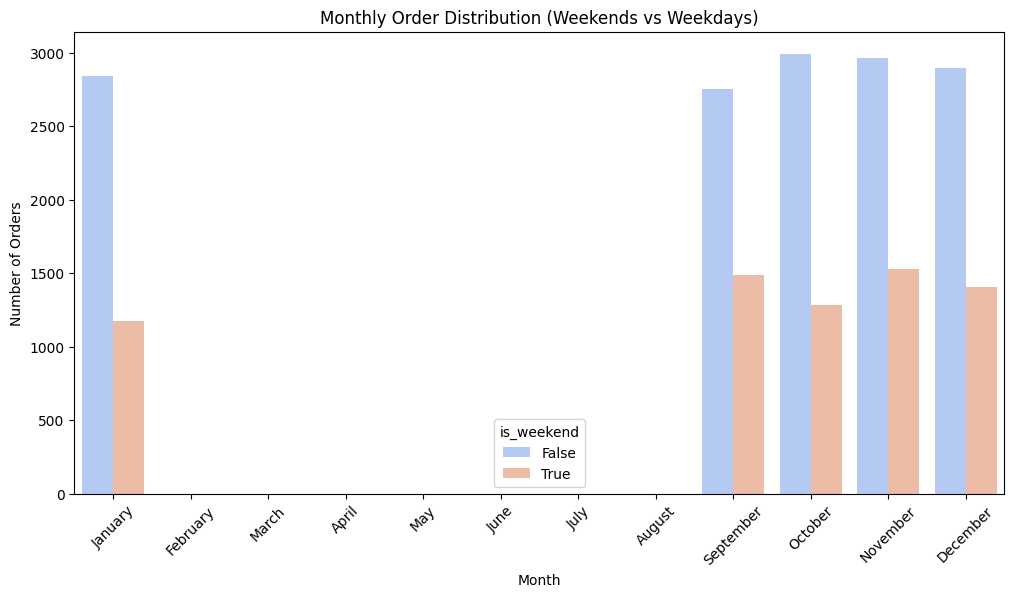

In [27]:
##OPTIONAL CODE
import calendar

# Define month order (Jan–Dec)
month_order = list(calendar.month_name[1:])

orders_summary = (
    df.groupby(['month_name', 'is_weekend'])['Order ID']
    .count()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=orders_summary,
    x='month_name', y='Order ID',
    hue='is_weekend', palette='coolwarm',
    order=month_order
)
plt.title('Monthly Order Distribution (Weekends vs Weekdays)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Hourly aggregation
hourly_orders = df.groupby(['date', 'hour'])['Order ID'].count().reset_index()
hourly_orders.rename(columns={'Order ID':'orders_count'}, inplace=True)

# Daily aggregation
daily_orders = df.groupby('date')['Order ID'].count().reset_index()
daily_orders.rename(columns={'Order ID':'orders_count'}, inplace=True)

# Monthly aggregation
df['month_year'] = df['Order_Datetime'].dt.to_period('M')
monthly_orders = df.groupby('month_year')['Order ID'].count().reset_index()
monthly_orders.rename(columns={'Order ID':'orders_count'}, inplace=True)

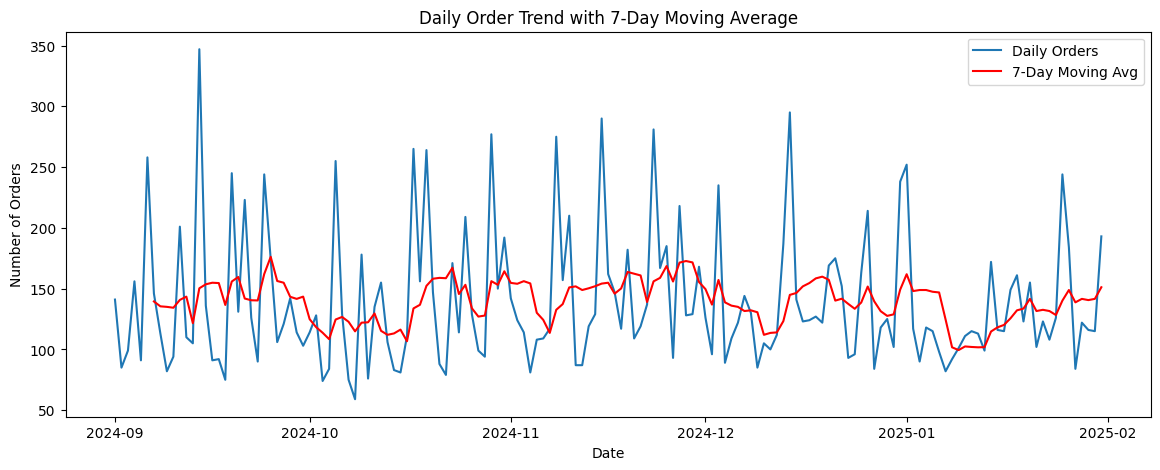

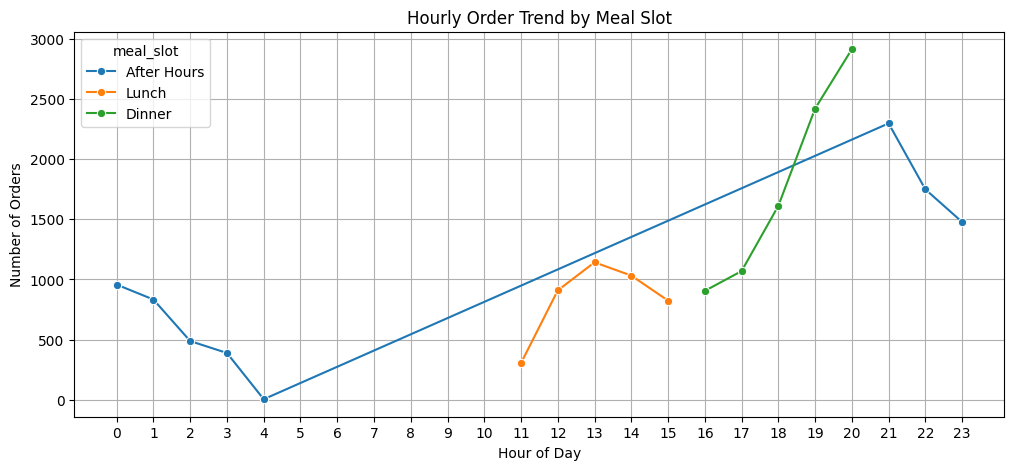

In [29]:
# Daily trend with moving average
daily_orders['orders_ma7'] = daily_orders['orders_count'].rolling(7).mean()  # 7-day MA
plt.figure(figsize=(14,5))
plt.plot(daily_orders['date'], daily_orders['orders_count'], label='Daily Orders')
plt.plot(daily_orders['date'], daily_orders['orders_ma7'], label='7-Day Moving Avg', color='red')
plt.title("Daily Order Trend with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()

# Hourly trend by meal slot
hourly_meal = df.groupby(['hour','meal_slot'])['Order ID'].count().reset_index()
hourly_meal = hourly_meal.sort_values('hour')

plt.figure(figsize=(12,5))
sns.lineplot(
    data=hourly_meal, 
    x='hour', y='Order ID', 
    hue='meal_slot', marker='o'
)
plt.title("Hourly Order Trend by Meal Slot")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.xticks(range(0,24))  # show all hours
plt.grid(True)
plt.show()


In [30]:
df.shape

(21321, 22)

## FEATURE ENGINEERING

In [31]:
# Existing
df['is_weekend'] = df['Order_Datetime'].dt.dayofweek >= 5
df['is_holiday'] = df['Order_Datetime'].dt.date.isin(indian_holidays)
df['hour'] = df['Order_Datetime'].dt.hour
df['meal_slot'] = df['hour'].apply(meal_slot)
df['month'] = df['Order_Datetime'].dt.month
df['month_name'] = df['Order_Datetime'].dt.month_name()

# Additional features
df['day_of_week'] = df['Order_Datetime'].dt.day_name()
df['quarter'] = df['Order_Datetime'].dt.quarter
df['week_of_year'] = df['Order_Datetime'].dt.isocalendar().week

# Aggregate features per restaurant/subzone
restaurant_orders = df.groupby(['Restaurant ID','date'])['Order ID'].count().reset_index()
restaurant_orders.rename(columns={'Order ID':'daily_orders_restaurant'}, inplace=True)
df = df.merge(restaurant_orders, on=['Restaurant ID','date'], how='left')


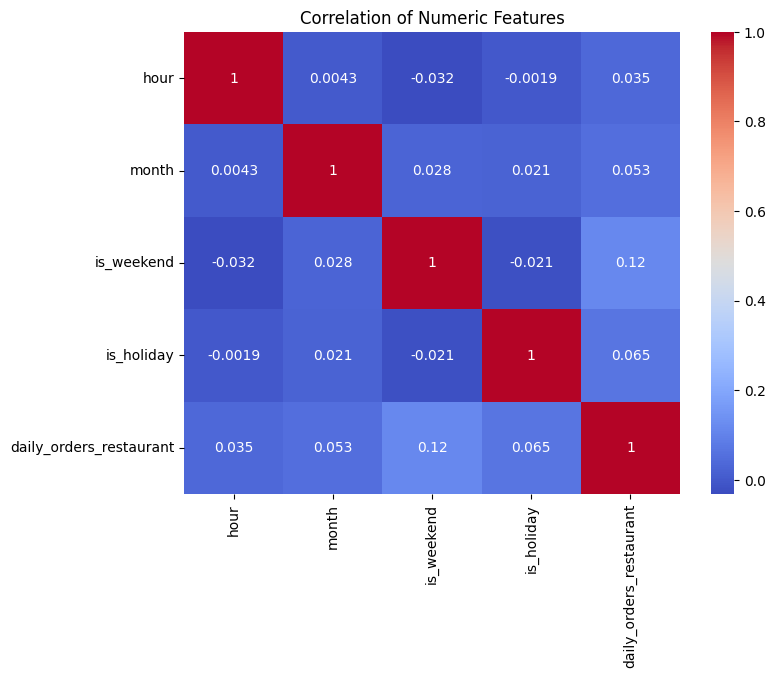

In [32]:
# Numeric correlation
numeric_cols = ['hour','month','is_weekend','is_holiday','daily_orders_restaurant']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Numeric Features")
plt.show()


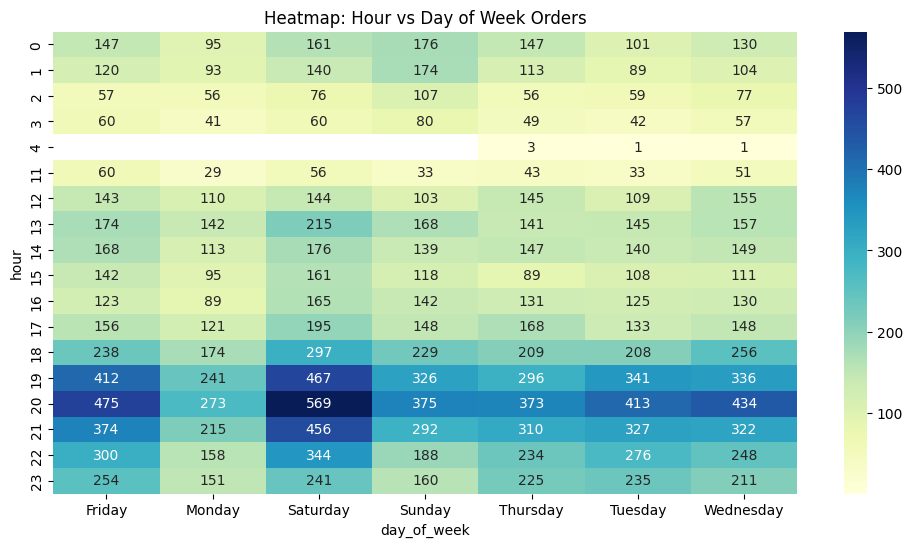

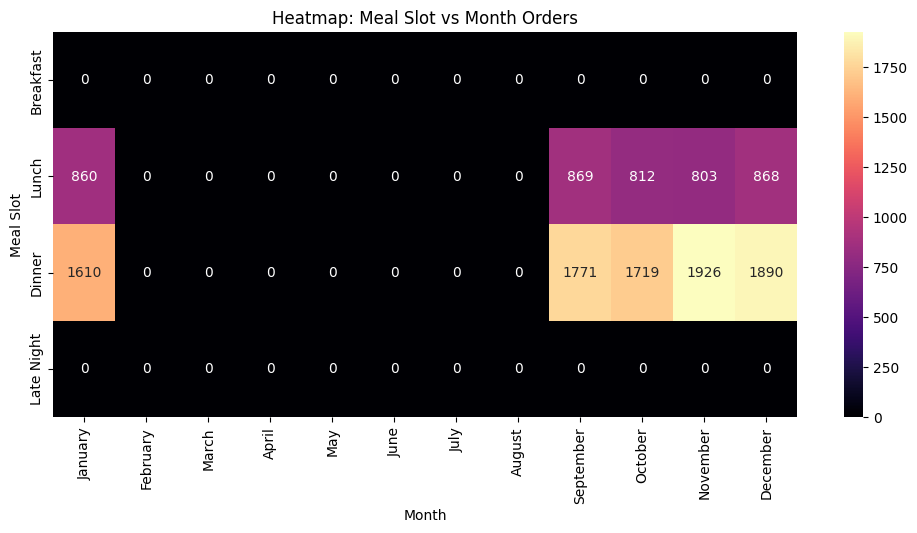

In [33]:
#hour vs day_of_week
pivot = df.pivot_table(index='hour', columns='day_of_week', values='Order ID', aggfunc='count')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Heatmap: Hour vs Day of Week Orders")
plt.show()

# meal_slot vs month
meal_order = ["Breakfast", "Lunch", "Dinner", "Late Night"]
month_order = list(calendar.month_name[1:])

pivot2 = df.pivot_table(
    index='meal_slot',
    columns='month_name',
    values='Order ID',
    aggfunc='count'
).reindex(index=meal_order, columns=month_order, fill_value=0)

# Plot heatmap
plt.figure(figsize=(12,5))
sns.heatmap(pivot2, cmap='magma', annot=True, fmt='.0f')
plt.title("Heatmap: Meal Slot vs Month Orders")
plt.xlabel("Month")
plt.ylabel("Meal Slot")
plt.show()


In [34]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Discount construct', 'expanded_items',
       'Order_Datetime', 'hour', 'day_of_week', 'date', 'meal_slot',
       'is_weekend', 'month', 'month_name', 'is_holiday', 'month_year',
       'quarter', 'week_of_year', 'daily_orders_restaurant'],
      dtype='object')

In [35]:
import numpy as np
import plotly.graph_objects as go

# Step 1: Restaurant coordinates (approximate)
restaurant_coords = {
    "Aura Pizzas": [28.5866, 77.2230],
    "Swaad": [28.5734, 77.2581],
    "Dilli Burger Adda": [28.6620, 77.2365],
    "Tandoori Junction": [28.6098, 77.0923],
    "The Chicken Junction": [28.6412, 77.2163],
    "Masala Junction": [28.5309, 77.1466]
}

# Map lat/lon to df
df['rest_lat'] = df['Restaurant name'].map(lambda x: restaurant_coords.get(x, [None, None])[0])
df['rest_lon'] = df['Restaurant name'].map(lambda x: restaurant_coords.get(x, [None, None])[1])

# Step 2: Convert Distance to float, handle <1 as 0.9
def clean_distance(d):
    if pd.isna(d):
        return np.nan
    d = d.replace('km','').strip()  
    if d.startswith('<'):
        return 0.9  # assign 0.9 km for "<1"
    try:
        return float(d)
    except:
        return np.nan

df['Distance_km'] = df['Distance'].apply(clean_distance)

# Step 3: Aggregate average and max distances per restaurant
dist_stats = df.groupby('Restaurant name')['Distance_km'].agg(['mean','max']).reset_index()

# Step 4: Aggregate order counts per Subzone
orders_per_subzone = df.groupby('Subzone').size().reset_index(name='Orders')

# Approximate subzone centers
subzone_coords = {
    'Greater Kailash 2 (GK2)': [28.5416, 77.2437],
    'Sector 4': [28.5900, 77.4000],
    'DLF Phase 1': [28.4590, 77.0300],
    'Sector 135': [28.5700, 77.3600],
    'Vasant Kunj': [28.5300, 77.1500],
    'Shahdara': [28.6667, 77.2700],
    'Chittaranjan Park': [28.5530, 77.2580],
    'Sikandarpur': [28.4970, 77.0830]
}
orders_per_subzone['lat'] = orders_per_subzone['Subzone'].map(lambda x: subzone_coords.get(x, [None, None])[0])
orders_per_subzone['lon'] = orders_per_subzone['Subzone'].map(lambda x: subzone_coords.get(x, [None, None])[1])

# Step 5: Create map
fig = go.Figure()

# Add restaurants
for _, row in dist_stats.iterrows():
    rest_name = row['Restaurant name']
    lat, lon = restaurant_coords[rest_name]
    fig.add_trace(go.Scattermapbox(
        lat=[lat],
        lon=[lon],
        mode='markers',
        marker=go.scattermapbox.Marker(size=10, color='blue'),
        name=rest_name,
        hovertemplate=(
            f"{rest_name}<br>"
            f"Avg dist: {row['mean']:.2f} km<br>"
            f"Max dist: {row['max']:.2f} km"
        )
    ))
    
    # Add avg and max distance circles
    for dist, color, label in zip([row['mean'], row['max']], ['green','red'], ['Avg','Max']):
        fig.add_trace(go.Scattermapbox(
            lat=[lat],
            lon=[lon],
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=dist*10,  # scale factor for visibility
                color=color,
                opacity=0.3
            ),
            name=f"{rest_name} {label} Distance",
            showlegend=False
        ))

# Add subzone order counts
fig.add_trace(go.Scattermapbox(
    lat=orders_per_subzone['lat'],
    lon=orders_per_subzone['lon'],
    mode='markers',
    marker=go.scattermapbox.Marker(size=orders_per_subzone['Orders'], color='red', sizemode='area'),
    text=orders_per_subzone['Subzone'] + ': ' + orders_per_subzone['Orders'].astype(str) + ' orders',
    name='Orders per Subzone'
))

# Layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=11,
    mapbox_center={"lat":28.6139, "lon":77.2090},
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show()


/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/1150416199.py:59: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/1150416199.py:74: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/1150416199.py:88: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [36]:
import random

# --- Example restaurant_coords and subzone_coords (use your actual data) ---
restaurant_coords = {
    'Aura Pizzas': [28.55, 77.25],
    'Swaad': [28.59, 77.36],
    'Dilli Burger Adda': [28.50, 77.20],
    'Tandoori Junction': [28.53, 77.15],
    'The Chicken Junction': [28.52, 77.21],
    'Masala Junction': [28.57, 77.35]
}

subzone_coords = {
    'Greater Kailash 2 (GK2)': [28.5416, 77.2437],
    'Sector 4': [28.5900, 77.4000],
    'DLF Phase 1': [28.4590, 77.0300],
    'Sector 135': [28.5700, 77.3600],
    'Vasant Kunj': [28.5300, 77.1500],
    'Shahdara': [28.6667, 77.2700],
    'Chittaranjan Park': [28.5530, 77.2580],
    'Sikandarpur': [28.4970, 77.0830]
}

# --- Your DataFrame `df` is already loaded ---
# Step 1: clean Distance column
df['Distance_km'] = df['Distance'].str.replace(r'\s*km','', regex=True)
df['Distance_km'] = df['Distance_km'].replace('<1', '0.9').astype(float)

# Step 2: aggregate delivery counts
delivery_counts = df.groupby(['Restaurant name','Subzone']).size().reset_index(name='count')

# Step 3: Prepare hover text for restaurants
restaurant_hover = {}
for rest in df['Restaurant name'].unique():
    deliveries = delivery_counts[delivery_counts['Restaurant name']==rest]
    hover_text = f"{rest}<br>Deliveries to sectors:<br>"
    for _, row in deliveries.iterrows():
        hover_text += f"{row['Subzone']}: {row['count']}<br>"
    restaurant_hover[rest] = hover_text

# Step 4: Prepare hover text for subzones
subzone_hover = {}
for sub in df['Subzone'].unique():
    deliveries = delivery_counts[delivery_counts['Subzone']==sub]
    hover_text = f"{sub}<br>Deliveries from restaurants:<br>"
    for _, row in deliveries.iterrows():
        hover_text += f"{row['Restaurant name']}: {row['count']}<br>"
    subzone_hover[sub] = hover_text

# --- Function to slightly jitter overlapping markers ---
def jitter(lat, lon, scale=0.0005):
    return lat + random.uniform(-scale, scale), lon + random.uniform(-scale, scale)

# Step 5: Plot
fig = go.Figure()

# Lines (constant thickness)
for _, row in delivery_counts.iterrows():
    r = row['Restaurant name']
    s = row['Subzone']
    fig.add_trace(go.Scattermapbox(
        lat=[restaurant_coords[r][0], subzone_coords[s][0]],
        lon=[restaurant_coords[r][1], subzone_coords[s][1]],
        mode='lines',
        line=go.scattermapbox.Line(width=4, color='green'),
        hoverinfo='none',
        showlegend=False
    ))

# Subzones (keep bigger for clarity)
for sub in subzone_coords:
    fig.add_trace(go.Scattermapbox(
        lat=[subzone_coords[sub][0]],
        lon=[subzone_coords[sub][1]],
        mode='markers',
        marker=go.scattermapbox.Marker(size=36, color='blue', opacity=0.7),
        name=sub,
        hoverinfo='text',
        hovertext=subzone_hover.get(sub, sub)
    ))

# Restaurants with jitter
for rest in restaurant_coords:
    lat, lon = jitter(restaurant_coords[rest][0], restaurant_coords[rest][1])
    fig.add_trace(go.Scattermapbox(
        lat=[lat],
        lon=[lon],
        mode='markers',
        marker=go.scattermapbox.Marker(size=12, color='red'),
        name=rest,
        hoverinfo='text',
        hovertext=restaurant_hover.get(rest, rest)
    ))

# Layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=11,
    mapbox_center={"lat":28.6139, "lon":77.2090},
    margin={"r":0,"t":0,"l":0,"b":0},
    legend=dict(font=dict(size=10)),
    height=900,
    width=1600
)

fig.show()


/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/415630738.py:61: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/415630738.py:72: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/415630738.py:85: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [37]:
# Shape, info
print(df.shape)
print(df.info())


(21321, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Restaurant ID            21321 non-null  int64         
 1   Restaurant name          21321 non-null  object        
 2   Subzone                  21321 non-null  object        
 3   City                     21321 non-null  object        
 4   Order ID                 21321 non-null  int64         
 5   Order Placed At          21321 non-null  object        
 6   Order Status             21321 non-null  object        
 7   Delivery                 21321 non-null  object        
 8   Distance                 21321 non-null  object        
 9   Items in order           21321 non-null  object        
 10  Discount construct       15823 non-null  object        
 11  expanded_items           21321 non-null  object        
 12  Order_Datetime      

In [38]:
# Null value check
null_summary = df.isnull().sum().sort_values(ascending=False)
print(null_summary[null_summary > 0])

Discount construct    5498
dtype: int64


In [ ]:
import numpy as np

# ------------------------------
# Fill missing values for the original column first
# ------------------------------
df['Discount construct'] = df['Discount construct'].fillna('None')

# ------------------------------
# Feature Engineering for Discounts
# ------------------------------
def engineer_discount_features(df_in):
    """
    Creates generalized features from the 'Discount construct' column.
    """
    df_out = df_in.copy()
    
    # 1. Create a new 'discount_type' column based on patterns
    conditions = [
        df_out['Discount construct'].str.contains('off upto', case=False, na=False),
        df_out['Discount construct'].str.contains('Flat', case=False, na=False),
        df_out['Discount construct'].str.contains('Buy 1 Get 1', case=False, na=False)
    ]
    choices = ['Percentage', 'Flat', 'BOGO']
    df_out['discount_type'] = np.select(conditions, choices, default='None')

    # 2. Extract numerical values using regular expressions
    # Extract the percentage value (e.g., 40 from "40% off...")
    df_out['discount_percentage'] = df_out['Discount construct'].str.extract(r'(\d+)%').astype(float)
    
    # Extract the flat discount amount (e.g., 175 from "Flat Rs.175 off")
    df_out['discount_flat_amount'] = df_out['Discount construct'].str.extract(r'Flat Rs\.?\s*([\d.]+)').astype(float)

    # 3. Fill any resulting NaN values with 0 (since no discount means a value of 0)
    df_out['discount_percentage'] = df_out['discount_percentage'].fillna(0)
    df_out['discount_flat_amount'] = df_out['discount_flat_amount'].fillna(0)
    
    return df_out

# Apply the function to the DataFrame
df = engineer_discount_features(df)

# Check the new features
print("New discount features created:")
print(df[['Discount construct', 'discount_type', 'discount_percentage', 'discount_flat_amount']].head())

New discount features created:
   Discount construct discount_type  discount_percentage  discount_flat_amount
0  40% off upto Rs.80    Percentage                 40.0                   0.0
1     Flat Rs.175 off          Flat                  0.0                 175.0
2  40% off upto Rs.80    Percentage                 40.0                   0.0
3  40% off upto Rs.80    Percentage                 40.0                   0.0
4  40% off upto Rs.80    Percentage                 40.0                   0.0


In [40]:
# Null value check
null_summary = df.isnull().sum().sort_values(ascending=False)
print(null_summary[null_summary > 0])

Series([], dtype: int64)


In [41]:
# ------------------------------
# Encode categorical variables (with the new discount_type)
# ------------------------------
# remove 'Discount construct' and new 'discount_type'
cat_cols = ['Restaurant ID', 'Subzone', 'City', 'Delivery', 'day_of_week', 'meal_slot', 'discount_type']

# drop the original 'Discount construct' column as it has been replaced
df = df.drop(columns=['Discount construct'])

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [42]:
def aggregate_features(df, group_col):
    # Target
    target = df.groupby(group_col).size().reset_index(name='orders')
    # Numeric features
    numeric_features = [c for c in df.columns if df[c].dtype in [int,float] and c != group_col]
    features = df.groupby(group_col)[numeric_features].mean().reset_index()
    # Merge features and target
    data = features.merge(target, on=group_col)
    return data

# -------------------------------
# Aggregate for different time windows
# -------------------------------
data_hourly = aggregate_features(df, 'hour')
data_daily = aggregate_features(df, 'date')
data_monthly = aggregate_features(df, 'month')

In [43]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to prepare X, y, split, polynomial, and scaling
def prepare_model_data(data, time_col):
    # -------------------------------
    # Split features & target
    # -------------------------------
    X = data.drop(columns=[time_col, 'orders'])
    y = data['orders'].values

    # Train-test split (no shuffle for time-series)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # -------------------------------
    # Polynomial Features
    # -------------------------------
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # -------------------------------
    # Scaling
    # -------------------------------
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    return X_train_scaled, X_test_scaled, y_train, y_test, poly, scaler

# -------------------------------
# Example usage: hourly
X_train_hour, X_test_hour, y_train_hour, y_test_hour, poly_hour, scaler_hour = prepare_model_data(data_hourly, 'hour')

# Example usage: daily
X_train_day, X_test_day, y_train_day, y_test_day, poly_day, scaler_day = prepare_model_data(data_daily, 'date')

# Example usage: monthly
X_train_month, X_test_month, y_train_month, y_test_month, poly_month, scaler_month = prepare_model_data(data_monthly, 'month')

# -------------------------------
#TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Example loop for hourly data
for train_idx, test_idx in tscv.split(X_train_hour):
    X_train_cv, X_test_cv = X_train_hour[train_idx], X_train_hour[test_idx]
    y_train_cv, y_test_cv = y_train_hour[train_idx], y_train_hour[test_idx]
    # Train your model here for CV


# LINEAR REGRESSION

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -------------------------------
# Function to run models
# -------------------------------
def run_linear_models(X_train, X_test, y_train, y_test, n_splits=5):
    models = {
        'Linear': {'model': LinearRegression(), 'params': {}},
        'Ridge': {'model': Ridge(), 'params': {'model__alpha': [0.01, 0.1, 1, 10, 100]}},
        'Lasso': {'model': Lasso(max_iter=10000, tol=1e-3, warm_start=True, random_state=42),
                  'params': {'model__alpha': [0.001, 0.01, 0.1, 1, 10]}},
        'ElasticNet': {'model': ElasticNet(max_iter=10000, tol=1e-3, warm_start=True, random_state=42),
                       'params': {'model__alpha':[0.001, 0.01, 0.1, 1], 'model__l1_ratio':[0.2,0.5,0.8]}}
    }

    best_models = {}

    # Adjust TimeSeriesSplit if training data is small
    tscv = TimeSeriesSplit(n_splits=min(n_splits, len(y_train)-1))

    for name, m in models.items():
        print(f"Running GridSearchCV for {name}...")

        pipeline = Pipeline([('model', m['model'])])

        # Use n_jobs=1 to avoid macOS joblib errors
        gsearch = GridSearchCV(
            estimator=pipeline,
            param_grid=m['params'],
            scoring='r2',
            cv=tscv,
            n_jobs=1
        )

        gsearch.fit(X_train, y_train)
        best_models[name] = gsearch.best_estimator_

        # Evaluate on last fold
        for train_idx, test_idx in tscv.split(X_train):
            X_train_cv, X_test_cv = X_train[train_idx], X_train[test_idx]
            y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]
        y_pred = gsearch.best_estimator_.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"{name} Best Params: {gsearch.best_params_}")
        print(f"{name} RMSE: {rmse:.3f}")
        print(f"{name} R2: {r2:.3f}\n")

    return best_models

# -------------------------------
# Run for hourly
print("=== HOURLY ===")
best_hourly = run_linear_models(X_train_hour, X_test_hour, y_train_hour, y_test_hour, n_splits=5)

# Run for daily
print("=== DAILY ===")
best_daily = run_linear_models(X_train_day, X_test_day, y_train_day, y_test_day, n_splits=5)

# Run for monthly (adjust n_splits for very small data)
print("=== MONTHLY ===")
best_monthly = run_linear_models(X_train_month, X_test_month, y_train_month, y_test_month, n_splits=2)


=== HOURLY ===
Running GridSearchCV for Linear...
Linear Best Params: {}
Linear RMSE: 733.721
Linear R2: -0.780

Running GridSearchCV for Ridge...
Ridge Best Params: {'model__alpha': 100}
Ridge RMSE: 1052.055
Ridge R2: -2.660

Running GridSearchCV for Lasso...
Lasso Best Params: {'model__alpha': 10}
Lasso RMSE: 270.682
Lasso R2: 0.758

Running GridSearchCV for ElasticNet...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+03, tolerance: 1.390e+03

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e+03, tolerance: 1.063e+03

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

ElasticNet Best Params: {'model__alpha': 1, 'model__l1_ratio': 0.2}
ElasticNet RMSE: 578.260
ElasticNet R2: -0.106

=== DAILY ===
Running GridSearchCV for Linear...
Linear Best Params: {}
Linear RMSE: 20.332
Linear R2: 0.756

Running GridSearchCV for Ridge...
Ridge Best Params: {'model__alpha': 10}
Ridge RMSE: 16.609
Ridge R2: 0.837

Running GridSearchCV for Lasso...
Lasso Best Params: {'model__alpha': 1}
Lasso RMSE: 15.522
Lasso R2: 0.858

Running GridSearchCV for ElasticNet...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.413e+03, tolerance: 1.032e+02

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.712e+03, tolerance: 1.589e+02

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

ElasticNet Best Params: {'model__alpha': 1, 'model__l1_ratio': 0.8}
ElasticNet RMSE: 15.167
ElasticNet R2: 0.864

=== MONTHLY ===
Running GridSearchCV for Linear...
Linear Best Params: {}
Linear RMSE: 389.139
Linear R2: nan

Running GridSearchCV for Ridge...
Ridge Best Params: {'model__alpha': 0.01}
Ridge RMSE: 388.882
Ridge R2: nan

Running GridSearchCV for Lasso...
Lasso Best Params: {'model__alpha': 0.001}
Lasso RMSE: 377.252
Lasso R2: nan

Running GridSearchCV for ElasticNet...
ElasticNet Best Params: {'model__alpha': 0.001, 'model__l1_ratio': 0.2}
ElasticNet RMSE: 376.398
ElasticNet R2: nan



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:1135: UserWarning:

One or more of the test scores are non-finite: [nan]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/Librar

# RANDOM FOREST

In [45]:
# Random Forest doesn't need scaling or polynomial features
def prepare_rf_data(data, time_col):
    X = data.drop(columns=[time_col, 'orders']).values
    y = data['orders'].values
    return X, y

In [46]:
X_rf_hour, y_rf_hour = prepare_rf_data(data_hourly, 'hour')
X_rf_day, y_rf_day = prepare_rf_data(data_daily, 'date')
X_rf_month, y_rf_month = prepare_rf_data(data_monthly, 'month')


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def run_rf(X, y, feature_names, max_splits=5):
    n_samples = X.shape[0]
    # Reduce splits if dataset is small
    n_splits = min(max_splits, n_samples - 1) if n_samples > 1 else 1

    rf_model = RandomForestRegressor(random_state=42)
    rf_params = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }

    pipeline_rf = Pipeline([('model', rf_model)])

    if n_splits > 1:
        tscv = TimeSeriesSplit(n_splits=n_splits)
        gsearch_rf = GridSearchCV(
            estimator=pipeline_rf,
            param_grid=rf_params,
            scoring='r2',
            cv=tscv,
            n_jobs=-1
        )
        gsearch_rf.fit(X, y)
        best_rf = gsearch_rf.best_estimator_
        print("Best Random Forest Params:", gsearch_rf.best_params_)
    else:
        # Not enough samples for CV
        best_rf = pipeline_rf.fit(X, y)
        print("Trained Random Forest without CV due to small dataset")

    # Evaluate on last fold (or whole data if small)
    y_pred = best_rf.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    print(f"Random Forest RMSE: {rmse:.3f}")
    print(f"Random Forest R2: {r2:.3f}")

    # Feature importances
    rf_importances = best_rf.named_steps['model'].feature_importances_
    rf_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rf_importances
    }).sort_values(by='Importance', ascending=False)

    print("Top Features:")
    print(rf_df.head(10))

    # Plot top 10
    plt.figure(figsize=(10,5))
    plt.barh(rf_df['Feature'].head(10), rf_df['Importance'].head(10))
    plt.title("Top 10 Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()

    return best_rf


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_89420d71d1314f6db324d0602e28b23e_8c408a69028746f9a40f9bc5d0d1498a for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-39500-l2jmm906 for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/

Best Random Forest Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Random Forest RMSE: 245.394
Random Forest R2: 0.893
Top Features:
                   Feature  Importance
6     discount_flat_amount    0.288807
3                 rest_lon    0.264066
1  daily_orders_restaurant    0.167548
5      discount_percentage    0.118550
2                 rest_lat    0.065137
4              Distance_km    0.061374
0                 Order ID    0.034517


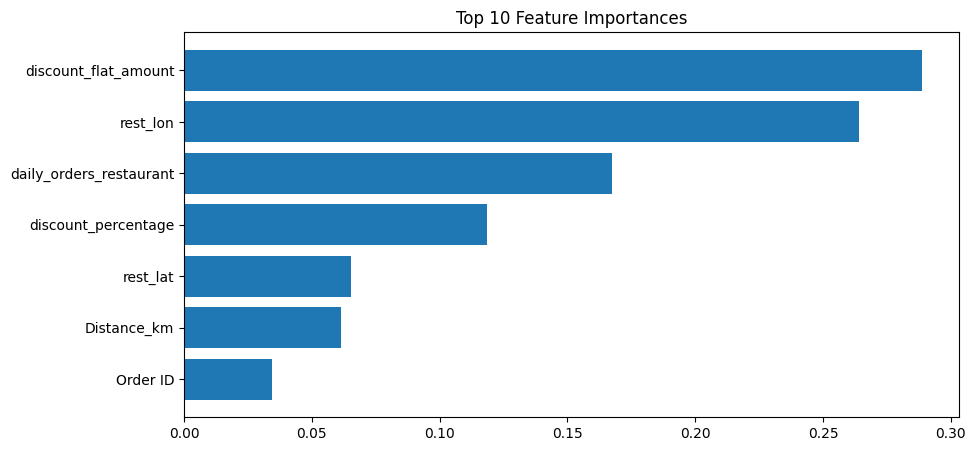

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_0f9ad78207334cd18a044abd4b130858_d709b13d4cc941eca5e1c13fc74526d8 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_89420d71d1314f6db324d0602e28b23e_886af4ff0947402eb3031594bec9659d for automatic cleanup: unk

Best Random Forest Params: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Random Forest RMSE: 8.450
Random Forest R2: 0.977
Top Features:
                   Feature  Importance
1  daily_orders_restaurant    0.943477
5      discount_percentage    0.014535
0                 Order ID    0.011897
3                 rest_lon    0.009461
4              Distance_km    0.007853
2                 rest_lat    0.007077
6     discount_flat_amount    0.005700


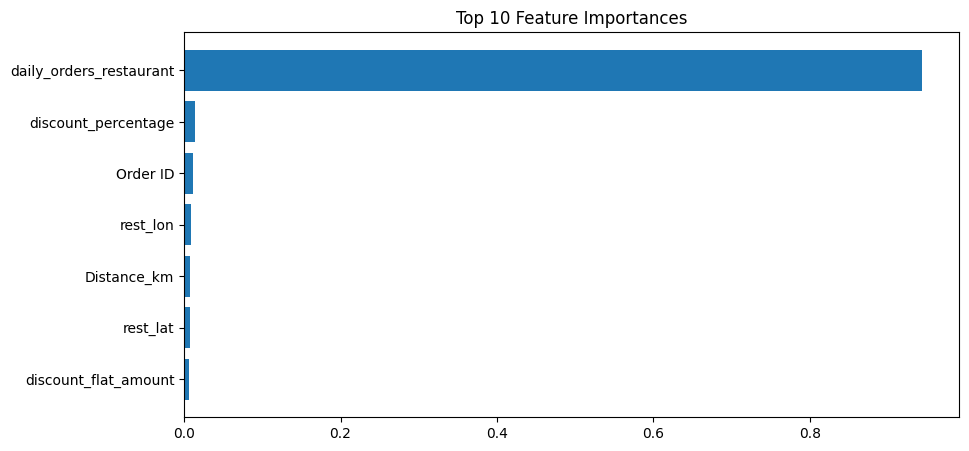

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_b4b4a38f5fbb47c6be7786cc20e37830_16cf02e13ca7466ea6eaf080cb9c71d7 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_89420d71d1314f6db324d0602e28b23e_26d9c871589c4973a9d55b689ca9b78f for automatic cleanup: unk

Best Random Forest Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Random Forest RMSE: 56.792
Random Forest R2: 0.863
Top Features:
                   Feature  Importance
1  daily_orders_restaurant    0.180131
4              Distance_km    0.164727
0                 Order ID    0.143860
5      discount_percentage    0.141527
3                 rest_lon    0.125020
2                 rest_lat    0.123006
6     discount_flat_amount    0.121730


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Pyth

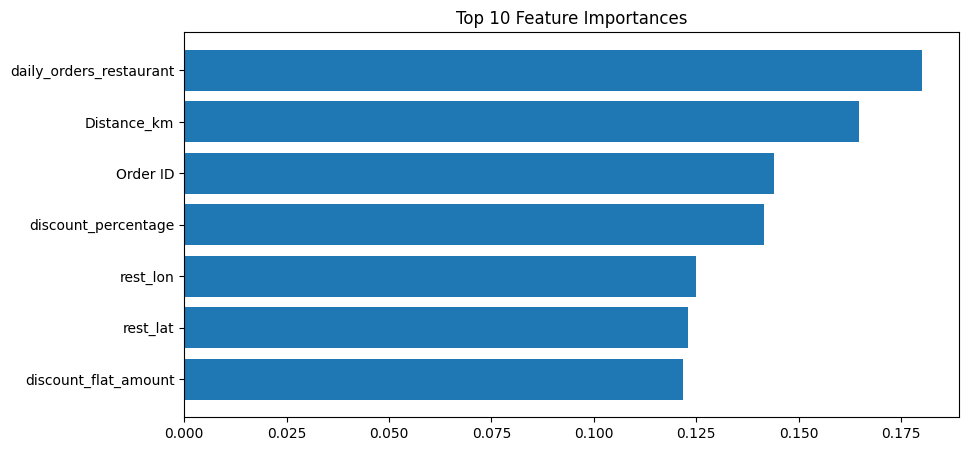

In [48]:
X_rf_hour, y_rf_hour = prepare_rf_data(data_hourly, 'hour')
X_rf_day, y_rf_day = prepare_rf_data(data_daily, 'date')
X_rf_month, y_rf_month = prepare_rf_data(data_monthly, 'month')

feature_names_hour = data_hourly.drop(columns=['hour', 'orders']).columns
feature_names_day = data_daily.drop(columns=['date', 'orders']).columns
feature_names_month = data_monthly.drop(columns=['month', 'orders']).columns

best_rf_hour = run_rf(X_rf_hour, y_rf_hour, feature_names_hour)
best_rf_day = run_rf(X_rf_day, y_rf_day, feature_names_day)
best_rf_month = run_rf(X_rf_month, y_rf_month, feature_names_month)


## XGBoost

In [49]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def run_xgb(X, y, feature_names, max_splits=5):
    n_samples = X.shape[0]
    # Reduce splits if dataset is small
    n_splits = min(max_splits, n_samples - 1) if n_samples > 1 else 1

    xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

    xgb_params = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.05, 0.1],
        'model__subsample': [0.7, 1.0]
    }

    pipeline_xgb = Pipeline([('model', xgb_model)])

    if n_splits > 1:
        tscv = TimeSeriesSplit(n_splits=n_splits)
        gsearch_xgb = GridSearchCV(
            estimator=pipeline_xgb,
            param_grid=xgb_params,
            scoring='r2',
            cv=tscv,
            n_jobs=-1
        )
        gsearch_xgb.fit(X, y)
        best_xgb = gsearch_xgb.best_estimator_
        print("Best XGBoost Params:", gsearch_xgb.best_params_)
    else:
        best_xgb = pipeline_xgb.fit(X, y)
        print("Trained XGBoost without CV due to small dataset")

    # Evaluate predictions
    y_pred = best_xgb.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    print(f"XGBoost RMSE: {rmse:.3f}")
    print(f"XGBoost R2: {r2:.3f}")

    # Feature importance
    xgb_importances = best_xgb.named_steps['model'].feature_importances_
    xgb_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': xgb_importances
    }).sort_values(by='Importance', ascending=False)

    print("Top Features:")
    print(xgb_df.head(10))

    # Plot
    plt.figure(figsize=(10,5))
    plt.barh(xgb_df['Feature'].head(10), xgb_df['Importance'].head(10))
    plt.title("XGBoost Top 10 Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()

    return best_xgb

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_86e58b8e82a84e628f6cdcd7e35a924d_14d9284284bd40fd901cec361b60fee0 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_89420d71d1314f6db324d0602e28b23e_53c1c5db688e426ba2b05aad4cdbf798 for automatic cleanup: unk

Best XGBoost Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.7}
XGBoost RMSE: 118.227
XGBoost R2: 0.975
Top Features:
                   Feature  Importance
6     discount_flat_amount    0.406896
3                 rest_lon    0.248899
5      discount_percentage    0.137349
1  daily_orders_restaurant    0.081013
0                 Order ID    0.049404
2                 rest_lat    0.040097
4              Distance_km    0.036342


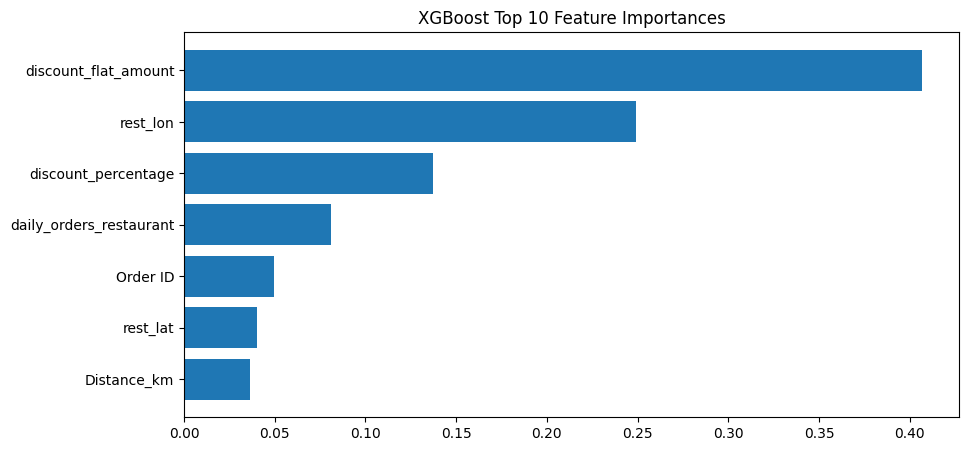

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_70adbaa5121a4689b62801c8fd0446c9_4eab4f0ba3964c84bc1601c973c69920 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_89420d71d1314f6db324d0602e28b23e_13fc467303174340bb58eea024fa7750 for automatic cleanup: unk

Best XGBoost Params: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__subsample': 0.7}
XGBoost RMSE: 3.353
XGBoost R2: 0.996
Top Features:
                   Feature  Importance
1  daily_orders_restaurant    0.883884
5      discount_percentage    0.036713
3                 rest_lon    0.019639
2                 rest_lat    0.018892
4              Distance_km    0.014878
6     discount_flat_amount    0.013045
0                 Order ID    0.012947


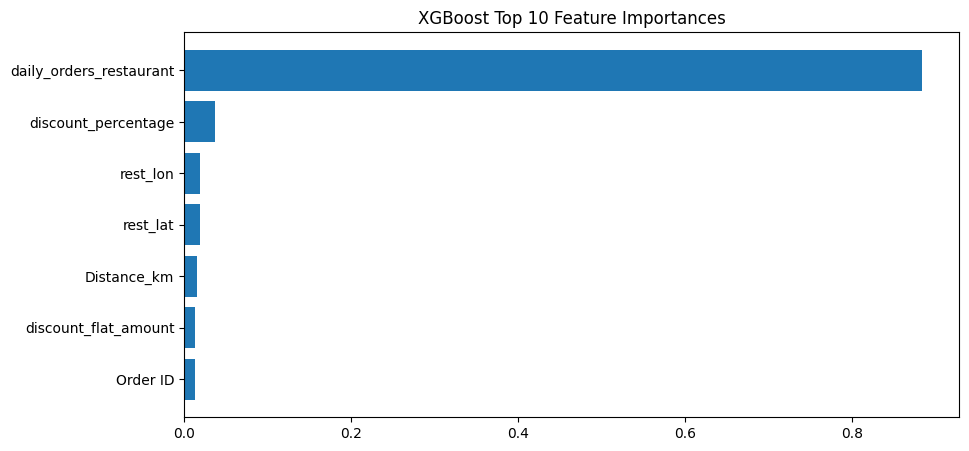

Best XGBoost Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.7}
XGBoost RMSE: 20.983
XGBoost R2: 0.981
Top Features:
                   Feature  Importance
5      discount_percentage    0.432223
6     discount_flat_amount    0.348098
3                 rest_lon    0.137586
0                 Order ID    0.059335
2                 rest_lat    0.022758
1  daily_orders_restaurant    0.000000
4              Distance_km    0.000000


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_a9c27b8d30444a88a515158bb7c4270f_434a5ba9d2a14bf9995c2a2413866213 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/joblib_memmapping_folder_39500_89420d71d1314f6db324d0602e28b23e_6a0841bc108b4727aefa7c9f0be9cfc0 for automatic cleanup: unk

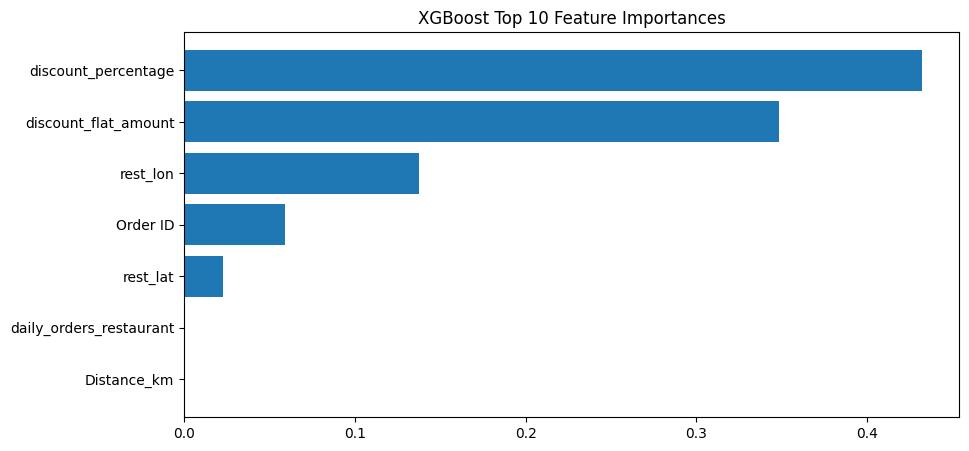

In [50]:
feature_names_hour = data_hourly.drop(columns=['hour', 'orders']).columns
feature_names_day = data_daily.drop(columns=['date', 'orders']).columns
feature_names_month = data_monthly.drop(columns=['month', 'orders']).columns

best_xgb_hour = run_xgb(X_rf_hour, y_rf_hour, feature_names_hour)
best_xgb_day = run_xgb(X_rf_day, y_rf_day, feature_names_day)
best_xgb_month = run_xgb(X_rf_month, y_rf_month, feature_names_month)


## Model Selection and Feature Importance


In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Function to evaluate a model
# -------------------------------
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

# -------------------------------
# Use the same feature sets used for training
# -------------------------------
data_splits = {
    "Hourly": {
        "Linear": (X_train_hour, X_test_hour, y_train_hour, y_test_hour),
        "Ridge": (X_train_hour, X_test_hour, y_train_hour, y_test_hour),
        "Lasso": (X_train_hour, X_test_hour, y_train_hour, y_test_hour),
        "ElasticNet": (X_train_hour, X_test_hour, y_train_hour, y_test_hour),
        "Random Forest": (X_rf_hour, X_rf_hour, y_rf_hour, y_rf_hour),
        "XGBoost": (X_rf_hour, X_rf_hour, y_rf_hour, y_rf_hour)
    },
    "Daily": {
        "Linear": (X_train_day, X_test_day, y_train_day, y_test_day),
        "Ridge": (X_train_day, X_test_day, y_train_day, y_test_day),
        "Lasso": (X_train_day, X_test_day, y_train_day, y_test_day),
        "ElasticNet": (X_train_day, X_test_day, y_train_day, y_test_day),
        "Random Forest": (X_rf_day, X_rf_day, y_rf_day, y_rf_day),
        "XGBoost": (X_rf_day, X_rf_day, y_rf_day, y_rf_day)
    },
    "Monthly": {
        "Linear": (X_train_month, X_test_month, y_train_month, y_test_month),
        "Ridge": (X_train_month, X_test_month, y_train_month, y_test_month),
        "Lasso": (X_train_month, X_test_month, y_train_month, y_test_month),
        "ElasticNet": (X_train_month, X_test_month, y_train_month, y_test_month),
        "Random Forest": (X_rf_month, X_rf_month, y_rf_month, y_rf_month),
        "XGBoost": (X_rf_month, X_rf_month, y_rf_month, y_rf_month)
    }
}

# -------------------------------
# Best models from earlier runs
# -------------------------------
best_models = {
    "Hourly": best_hourly | {"Random Forest": best_rf_hour, "XGBoost": best_xgb_hour},
    "Daily": best_daily | {"Random Forest": best_rf_day, "XGBoost": best_xgb_day},
    "Monthly": best_monthly | {"Random Forest": best_rf_month, "XGBoost": best_xgb_month}
}

# -------------------------------
# Run evaluation
# -------------------------------
results_list = []

for timeframe, models_dict in best_models.items():
    for model_name, model in models_dict.items():
        X_train, X_test, y_train, y_test = data_splits[timeframe][model_name]

        # Linear models might have too few test samples for R2
        if len(y_test) < 2 and model_name in ["Linear", "Ridge", "Lasso", "ElasticNet"]:
            rmse, r2 = (np.nan, np.nan)
        else:
            rmse, r2 = evaluate_model(model, X_test, y_test)

        results_list.append({
            "Timeframe": timeframe,
            "Model": model_name,
            "RMSE": rmse,
            "R2 Score": r2
        })

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by=["Timeframe", "R2 Score"], ascending=[True, False])

In [52]:
print("--- Model Performance Comparison ---")
results_df

--- Model Performance Comparison ---


,Timeframe,Model,RMSE,R2 Score
11,Daily,XGBoost,3.353455,0.996303
10,Daily,Random Forest,8.450101,0.976527
9,Daily,ElasticNet,15.166866,0.864055
8,Daily,Lasso,15.522145,0.857611
7,Daily,Ridge,16.609218,0.836969
6,Daily,Linear,20.332318,0.755688
5,Hourly,XGBoost,118.226705,0.975112
4,Hourly,Random Forest,245.393582,0.892777
2,Hourly,Lasso,270.681761,0.757694
3,Hourly,ElasticNet,578.260482,-0.105844


### Based on the results, the Daily XGBoost model is the top performer. We will analyze its feature importances.


/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_39500/3190974349.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




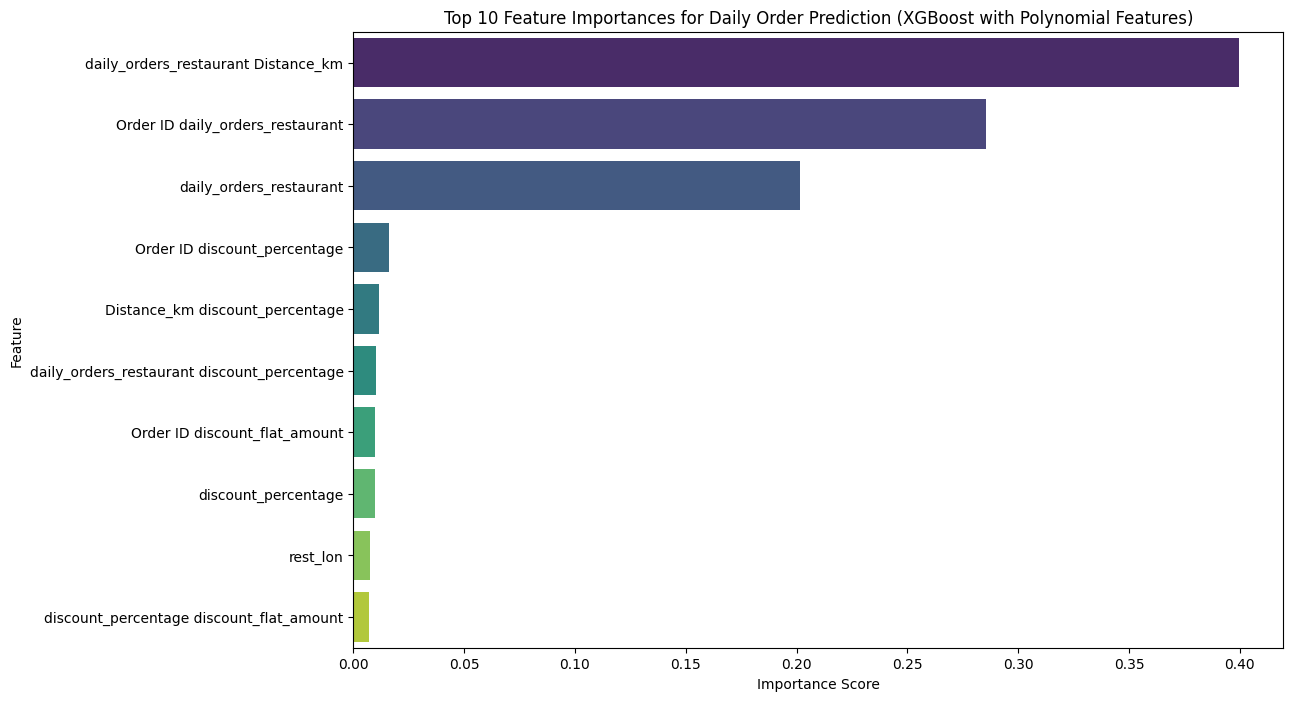


Top 10 Feature Importances:
                                        Feature  Importance
17          daily_orders_restaurant Distance_km    0.399613
8              Order ID daily_orders_restaurant    0.285605
1                       daily_orders_restaurant    0.201750
12                 Order ID discount_percentage    0.016138
30              Distance_km discount_percentage    0.011660
18  daily_orders_restaurant discount_percentage    0.010473
13                Order ID discount_flat_amount    0.009932
5                           discount_percentage    0.009667
3                                      rest_lon    0.007567
33     discount_percentage discount_flat_amount    0.007107


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import pandas as pd

# The model definition and fitting are correct
best_daily_model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7, random_state=42)
best_daily_model.fit(X_train_day, y_train_day)

# Get the original feature names before the polynomial transformation
original_feature_names = data_daily.drop(columns=['date', 'orders']).columns

# Use the 'poly_day' object (from cell 43) to get the NEW feature names after transformation
feature_names_day_poly = poly_day.get_feature_names_out(original_feature_names)
# ------------------------------------

# Create a DataFrame for feature importances using the correct, longer list of names
importances = best_daily_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names_day_poly, # Use the correct feature names here
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Daily Order Prediction (XGBoost with Polynomial Features)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

print("\nTop 10 Feature Importances:")
print(feature_importance_df.head(10))

In [ ]:
# First, ensure the 'date' column exists
df['date'] = df['Order_Datetime'].dt.date

# Function to aggregate features
def aggregate_features(df, group_col):
    # Target
    target = df.groupby(group_col).size().reset_index(name='orders')
    
    # Get all boolean and numeric columns for aggregation
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    bool_cols = df.select_dtypes(include=bool).columns.tolist()
    
    # We need to explicitly handle boolean columns for aggregation by converting them to int
    aggregation_df = df.copy()
    for col in bool_cols:
        aggregation_df[col] = aggregation_df[col].astype(int)
        
    # In the notebook, all dummy variables (which are numeric) are also included.
    dummy_cols_to_agg = [col for col in df.columns if df[col].dtype in ['uint8', 'int64', 'float64', 'int32', 'bool', 'UInt32'] and col not in ['Order ID', group_col, 'orders']]

    features = df.groupby(group_col)[dummy_cols_to_agg].mean().reset_index()
    
    # Merge features and target
    data = features.merge(target, on=group_col)
    return data

# Aggregate for daily data
data_daily = aggregate_features(df, 'date')

# Define X (features) and y (target)
X_daily_features = data_daily.drop(columns=['date', 'orders'])
y_daily_target = data_daily['orders']


print("--- Target Variable (y) ---")
print("The target is the daily total order count, named 'orders'.")
print("\n--- List of Final Feature Names (X) ---")
for feature in X_daily_features.columns:
    print(feature)

--- Target Variable (y) ---
The target is the daily total order count, named 'orders'.

--- List of Final Feature Names (X) ---
hour
is_weekend
month
is_holiday
quarter
week_of_year
daily_orders_restaurant
rest_lat
rest_lon
Distance_km
discount_percentage
discount_flat_amount
Restaurant ID_20554001
Restaurant ID_20635699
Restaurant ID_20659868
Restaurant ID_20882652
Restaurant ID_20882713
Restaurant ID_20968171
Restaurant ID_20968194
Restaurant ID_20968206
Restaurant ID_21077127
Restaurant ID_21114574
Restaurant ID_21143186
Restaurant ID_21145152
Restaurant ID_21173951
Restaurant ID_21309083
Restaurant ID_21350931
Restaurant ID_21424296
Restaurant ID_21467269
Restaurant ID_21467440
Restaurant ID_21467512
Restaurant ID_21523055
Subzone_DLF Phase 1
Subzone_Greater Kailash 2 (GK2)
Subzone_Sector 135
Subzone_Sector 4
Subzone_Shahdara
Subzone_Sikandarpur
Subzone_Vasant Kunj
day_of_week_Monday
day_of_week_Saturday
day_of_week_Sunday
day_of_week_Thursday
day_of_week_Tuesday
day_of_week_Wednes